In [101]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

csv0 = '../Presentation/clean/clean_od15.csv'
clean_od_2015 = pd.read_csv(csv0)

csv1 = '../Presentation/clean/clean_od16.csv'
clean_od_2016 = pd.read_csv(csv1)

csv2 = '../Presentation/clean/op_final_15.csv'
op_final_15 = pd.read_csv(csv2)

csv3 = '../Presentation/clean/op_final_16.csv'
op_final_16 = pd.read_csv(csv3)

csv4 = '../Presentation/clean/PAC_Scores_2015.csv'
PAC_Scores_2015 = pd.read_csv(csv4)

csv5 = '../Presentation/clean/PAC_Scores_2016_f.csv'
PAC_Scores_2016 = pd.read_csv(csv5)

csv7 = '../Presentation/clean/op_pac_final_15.csv'
op_pac_final_15 = pd.read_csv(csv7)

csv8 = '../Presentation/clean/op_pac_final_16.csv'
op_pac_final_16 = pd.read_csv(csv8)

csv9 = '../Presentation/clean/state_op_final_15.csv'
state_op_final_15 = pd.read_csv(csv9)

csv10 = '../Presentation/clean/state_op_final_16.csv'
state_op_final_16 = pd.read_csv(csv10)


csv12 = "../Presentation/clean/PAC_Scores_2015_group.csv"
PAC_group_2015 = pd.read_csv(csv12)

csv13 = "../Presentation/clean/PAC_Scores_2016_group.csv"
PAC_group_2016 = pd.read_csv(csv13)

In [3]:
PAC_group_2016.head()

,Group PAC ID,Measure Performance Rate,Year,State,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
0,42105678,67.625,2016,PA,612.0,25.0,4.084967
1,42122244,64.250,2016,CA,8843.0,457.0,5.167929
2,42128548,66.250,2016,TX,11588.0,1448.0,12.495685
3,143134270,59.250,2016,AR,18320.0,466.0,2.543668
4,244124212,67.875,2016,PA,40135.0,2106.0,5.247290


In [4]:
PAC_group_2015.head()

,Group PAC ID,Measure Performance Rate,Year,State,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
0,42105678,65.875,2015,PA,29587.0,782.0,2.643053
1,42128548,65.125,2015,TX,3331.0,114.0,3.422396
2,244136067,53.800,2015,MI,433.0,41.0,9.468822
3,244136448,55.600,2015,LA,3295.0,203.0,6.160850
4,244143246,66.500,2015,NC,1427.0,470.0,32.936230


In [62]:
print(len(PAC_group_2015))
print(PAC_group_2015["Group PAC ID"].nunique())

254
254


In [5]:
clean_od_2015.head()

,Year,State,Year.1,Month,Total Deaths,Drug Deaths
0,2015,AK,2015,January,4034,126
1,2015,AK,2015,February,4084,127
2,2015,AK,2015,March,4101,125
3,2015,AK,2015,April,4133,126
4,2015,AK,2015,May,4196,125


In [6]:
clean_od_2016.head()

,Year,State,Year.1,Month,Total Deaths,Drug Deaths
0,2016,AK,2016,January,4213,126
1,2016,AK,2016,February,4198,128
2,2016,AK,2016,March,4230,125
3,2016,AK,2016,April,4262,132
4,2016,AK,2016,May,4241,140


In [27]:
od_state_2016 = pd.DataFrame(clean_od_2016.groupby(["State"])["Drug Deaths","Total Deaths"].sum())
od_state_2016.head()


,Drug Deaths,Total Deaths
State,,
AK,1594,51141
AL,8324,608611
AR,4513,366574
AZ,16403,679217
CA,57154,3139581


In [28]:
od_state_2015= pd.DataFrame(clean_od_2015.groupby(["State"])["Drug Deaths","Total Deaths"].sum())
od_state_2015.head()


,Drug Deaths,Total Deaths
State,,
AK,1472,50086
AL,8818,607641
AR,4616,368117
AZ,14590,642297
CA,56001,3056952


In [29]:
PAC_group_state16 = pd.DataFrame(PAC_group_2016.groupby(["State"])["Opioid Prescribing Rate","Measure Performance Rate"].mean())
PAC_group_state16[["Total Claim Count","Opioid Claim Count"]] = PAC_group_2016.groupby(["State"])["Total Claim Count","Opioid Claim Count"].sum()
PAC_group_state16.head()

,Opioid Prescribing Rate,Measure Performance Rate,Total Claim Count,Opioid Claim Count
State,,,,
AL,5.029590,60.416667,72718.0,4312.0
AR,2.543668,59.250000,18320.0,466.0
AZ,12.243259,57.617063,58469.0,7237.0
CA,6.521127,65.050926,183149.0,11487.0
CO,3.627322,63.208333,77731.0,3074.0


In [30]:
PAC_group_state15 = pd.DataFrame(PAC_group_2015.groupby(["State"])["Opioid Prescribing Rate","Measure Performance Rate"].mean())
PAC_group_state15[["Total Claim Count","Opioid Claim Count"]] = PAC_group_2015.groupby(["State"])["Total Claim Count","Opioid Claim Count"].sum()
PAC_group_state15.head()

,Opioid Prescribing Rate,Measure Performance Rate,Total Claim Count,Opioid Claim Count
State,,,,
AK,28.169014,6.000000,142.0,40.0
AL,14.493353,56.500000,99324.0,7305.0
AR,6.806352,63.812500,954.0,66.0
AZ,16.973309,55.395833,363.0,61.0
CA,13.953721,65.172619,31084.0,3173.0


In [67]:
#Merge our data set of pac_group_16 data with the Drug Deaths and Total Deaths of 2016

merged_state_rate_deaths16 = PAC_group_state16.merge(od_state_2016, on="State", how='outer')

#Merge our data set of pac_group_15 data with the Drug Deaths and Total Deaths of 2015
merged_state_rate_deaths15 = PAC_group_state15.merge(od_state_2015, on="State", how='outer')

In [68]:
#Show our new 16 data by state
merged_state_rate_deaths16.head()

,Opioid Prescribing Rate,Measure Performance Rate,Total Claim Count,Opioid Claim Count,Drug Deaths,Total Deaths
State,,,,,,
AL,5.029590,60.416667,72718.0,4312.0,8324,608611
AR,2.543668,59.250000,18320.0,466.0,4513,366574
AZ,12.243259,57.617063,58469.0,7237.0,16403,679217
CA,6.521127,65.050926,183149.0,11487.0,57154,3139581
CO,3.627322,63.208333,77731.0,3074.0,11137,450894


In [69]:
len(merged_state_rate_deaths16)

52

In [70]:
#Show our new 15 data by state
merged_state_rate_deaths15.head()

,Opioid Prescribing Rate,Measure Performance Rate,Total Claim Count,Opioid Claim Count,Drug Deaths,Total Deaths
State,,,,,,
AK,28.169014,6.000000,142.0,40.0,1472,50086
AL,14.493353,56.500000,99324.0,7305.0,8818,607641
AR,6.806352,63.812500,954.0,66.0,4616,368117
AZ,16.973309,55.395833,363.0,61.0,14590,642297
CA,13.953721,65.172619,31084.0,3173.0,56001,3056952


In [71]:
len(merged_state_rate_deaths15)

52

In [72]:
#Drop any columns with null values. Expecting this to drop our data from 52 states/territories
#Drop values from 2016 data
merged_state_rate_deaths16 = merged_state_rate_deaths16.dropna(axis=0 , how='any')
merged_state_rate_deaths16.head()

,Opioid Prescribing Rate,Measure Performance Rate,Total Claim Count,Opioid Claim Count,Drug Deaths,Total Deaths
State,,,,,,
AL,5.029590,60.416667,72718.0,4312.0,8324,608611
AR,2.543668,59.250000,18320.0,466.0,4513,366574
AZ,12.243259,57.617063,58469.0,7237.0,16403,679217
CA,6.521127,65.050926,183149.0,11487.0,57154,3139581
CO,3.627322,63.208333,77731.0,3074.0,11137,450894


In [74]:
group_avgprescriberate_16 = merged_state_rate_deaths16["Opioid Prescribing Rate"].mean()
group_avgprescriberate_16

8.266271753130914

In [75]:
len(merged_state_rate_deaths16)

44

In [76]:
#Drop values from 2015 data
merged_state_rate_deaths15 = merged_state_rate_deaths15.dropna(axis=0 , how='any')
merged_state_rate_deaths15.head()

,Opioid Prescribing Rate,Measure Performance Rate,Total Claim Count,Opioid Claim Count,Drug Deaths,Total Deaths
State,,,,,,
AK,28.169014,6.000000,142.0,40.0,1472,50086
AL,14.493353,56.500000,99324.0,7305.0,8818,607641
AR,6.806352,63.812500,954.0,66.0,4616,368117
AZ,16.973309,55.395833,363.0,61.0,14590,642297
CA,13.953721,65.172619,31084.0,3173.0,56001,3056952


In [77]:
group_avgprescriberate_15 = merged_state_rate_deaths15["Opioid Prescribing Rate"].mean()
group_avgprescriberate_15

10.31463253372905

In [78]:
len(merged_state_rate_deaths15)

46

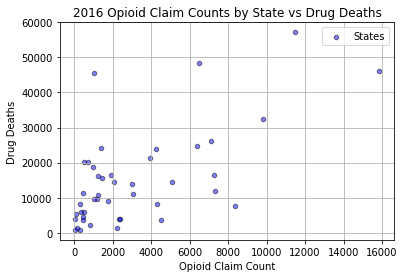

In [79]:
#Plot Opioid Claim Counts of Group PAC by State vs Drug Deaths for 2016
merged_state_rate_deaths16.plot.scatter(x="Opioid Claim Count", y='Drug Deaths', color='Blue', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='States')
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("2016 Opioid Claim Counts by State vs Drug Deaths")
plt.xlabel("Opioid Claim Count")
plt.ylabel("Drug Deaths")


plt.show()


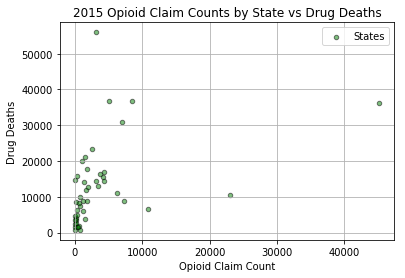

In [80]:
#Plot Opioid Claim Counts of Group PAC by State vs Drug Deaths for 2015
merged_state_rate_deaths15.plot.scatter(x="Opioid Claim Count", y='Drug Deaths', color='Green', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='States')
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("2015 Opioid Claim Counts by State vs Drug Deaths")
plt.xlabel("Opioid Claim Count")
plt.ylabel("Drug Deaths")

plt.show()


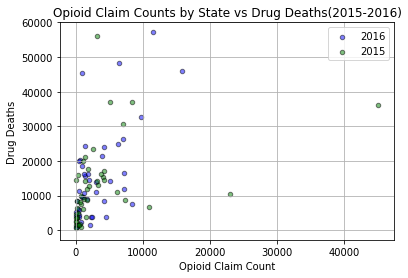

In [91]:
#Combined Plot of  Opioid Claim Counts for Group PAC by State vs Drug Deaths for 2015 & 2016
#Plot Opioid Claim Counts of Group PAC by State vs Drug Deaths for 2016
ax = merged_state_rate_deaths16.plot.scatter(x="Opioid Claim Count", y='Drug Deaths', color='Blue', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='2016')
#Plot Opioid Claim Counts of Group PAC by State vs Drug Deaths for 2015
merged_state_rate_deaths15.plot.scatter(x="Opioid Claim Count", y='Drug Deaths', color='Green', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='2015', ax=ax)

#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("Opioid Claim Counts by State vs Drug Deaths(2015-2016)")
plt.xlabel("Opioid Claim Count")
plt.ylabel("Drug Deaths")

plt.savefig("../Presentation/graphs/opioid_claims_drug_deaths")

plt.show()


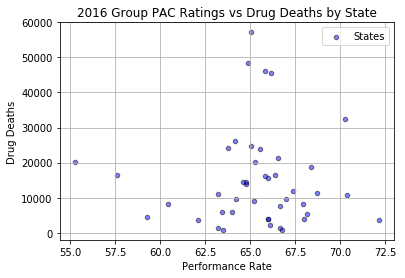

In [93]:
#Plot our Average Performance Rates of Group PACs by State vs Drug Deaths for 2016
merged_state_rate_deaths16.plot.scatter(x="Measure Performance Rate", y='Drug Deaths', color='Blue', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='States')
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("2016 Group PAC Ratings vs Drug Deaths by State")
plt.xlabel("Performance Rate")
plt.ylabel("Drug Deaths")

plt.show()


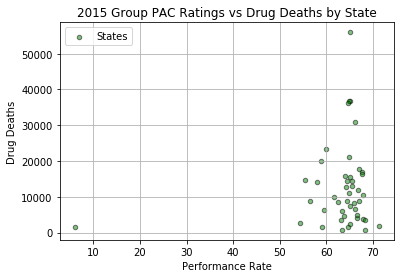

In [83]:
#Plot our Average Performance Rates of Group PACs by State vs Drug Deaths for 2015
merged_state_rate_deaths15.plot.scatter(x="Measure Performance Rate", y='Drug Deaths', color='Green', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='States')
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("2015 Group PAC Ratings vs Drug Deaths by State")
plt.xlabel("Performance Rate")
plt.ylabel("Drug Deaths")

plt.show()


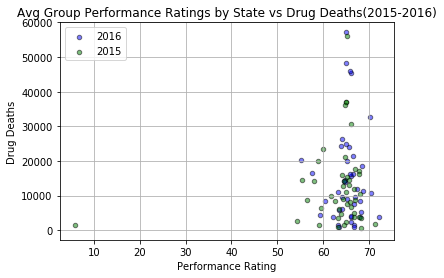

In [96]:
#Combined Plot for  Average Group PAC Ratings State vs Drug Deaths for 2015 & 2016
#Plot Avg Ratings for Group PAC by State vs Drug Deaths for 2016
ax = merged_state_rate_deaths16.plot.scatter(x="Measure Performance Rate", y='Drug Deaths', color='Blue', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='2016')
#Plot our Average Performance Rates of Group PACs by State vs Drug Deaths for 2015
merged_state_rate_deaths15.plot.scatter(x="Measure Performance Rate", y='Drug Deaths', color='Green', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='2015', ax=ax)
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("Avg Group Performance Ratings by State vs Drug Deaths(2015-2016)")
plt.xlabel("Performance Rating")
plt.ylabel("Drug Deaths")

plt.savefig("../Presentation/graphs/performance_ratings_vs_drugdeaths")

plt.show()


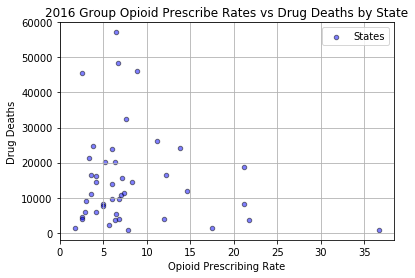

In [84]:
#Plot our Average Prescribed Rates of Group PACs by State vs Drug Deaths for 2016
merged_state_rate_deaths16.plot.scatter(x="Opioid Prescribing Rate", y='Drug Deaths', color='Blue', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='States')
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("2016 Group Opioid Prescribe Rates vs Drug Deaths by State")
plt.xlabel("Opioid Prescribing Rate")
plt.ylabel("Drug Deaths")

plt.show()


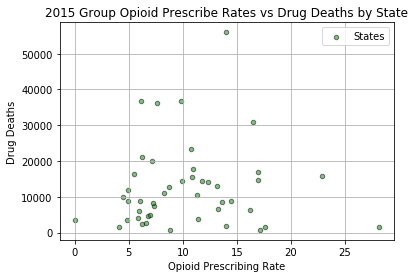

In [85]:
#Plot our Average Prescribed Rates of Group PACs by State vs Drug Deaths for 2015
merged_state_rate_deaths15.plot.scatter(x="Opioid Prescribing Rate", y='Drug Deaths', color='Green', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='States')
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("2015 Group Opioid Prescribe Rates vs Drug Deaths by State")
plt.xlabel("Opioid Prescribing Rate")
plt.ylabel("Drug Deaths")

plt.show()

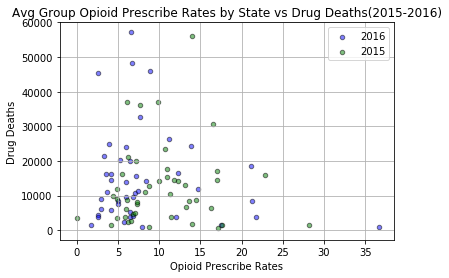

In [98]:
#combined plot comparing Average Opioid Prescibed Rates of Group PACs by State vs Drug Deaths for 2015-2016
#Plot our Average Prescribed Rates of Group PACs by State vs Drug Deaths for 2016
ax = merged_state_rate_deaths16.plot.scatter(x="Opioid Prescribing Rate", y='Drug Deaths', color='Blue', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='2016')
#Plot our Average Prescribed Rates of Group PACs by State vs Drug Deaths for 2015
merged_state_rate_deaths15.plot.scatter(x="Opioid Prescribing Rate", y='Drug Deaths', color='Green', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='2015', ax=ax)
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("Avg Group Opioid Prescribe Rates by State vs Drug Deaths(2015-2016)")
plt.xlabel("Opioid Prescribe Rates")
plt.ylabel("Drug Deaths")

plt.savefig("../Presentation/graphs/opioid_prescriberates_vs_drugdeaths")

plt.show()


In [86]:
#Begin to analyse performance data of group PACs and their Opioid Prescribed Rates
PAC_group_2015.head()

,Group PAC ID,Measure Performance Rate,Year,State,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate
0,42105678,65.875,2015,PA,29587.0,782.0,2.643053
1,42128548,65.125,2015,TX,3331.0,114.0,3.422396
2,244136067,53.800,2015,MI,433.0,41.0,9.468822
3,244136448,55.600,2015,LA,3295.0,203.0,6.160850
4,244143246,66.500,2015,NC,1427.0,470.0,32.936230


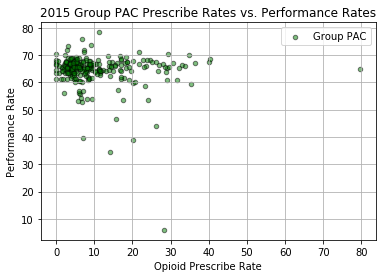

In [87]:
#Plot our  Prescribed Rates of Group PACs  vs Performance Rates for 2015
PAC_group_2015.plot.scatter(x="Opioid Prescribing Rate", y='Measure Performance Rate', color='Green', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='Group PAC')
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("2015 Group PAC Prescribe Rates vs. Performance Rates")
plt.xlabel("Opioid Prescribe Rate")
plt.ylabel("Performance Rate")

plt.show()

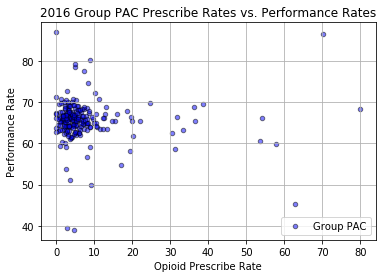

In [88]:
#Plot our  Prescribed Rates of Group PACs  vs Performance Rates for 2016
PAC_group_2016.plot.scatter(x="Opioid Prescribing Rate", y='Measure Performance Rate', color='Blue', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='Group PAC')
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("2016 Group PAC Prescribe Rates vs. Performance Rates")
plt.xlabel("Opioid Prescribe Rate")
plt.ylabel("Performance Rate")

plt.show()

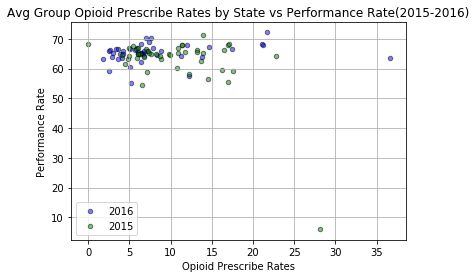

In [100]:
#combined plot comparing Average Opioid Prescibed Rates of Group PACs by State vs Performance for 2015-2016
#Plot our Average Prescribed Rates of Group PACs by State vs Performance for 2016
ax = merged_state_rate_deaths16.plot.scatter(x="Opioid Prescribing Rate", y='Measure Performance Rate', color='Blue', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='2016')
#Plot our Average Prescribed Rates of Group PACs by State vs Performance for 2015
merged_state_rate_deaths15.plot.scatter(x="Opioid Prescribing Rate", y='Measure Performance Rate', color='Green', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='2015', ax=ax)
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("Avg Group Opioid Prescribe Rates by State vs Performance Rate(2015-2016)")
plt.xlabel("Opioid Prescribe Rates")
plt.ylabel("Performance Rate")

plt.savefig("../Presentation/graphs/state_opioid_prescriberates_vs_performance")

plt.show()
